## Credit Card Fraud Detection- Capstone Project

In this project you will predict fraudulent credit card transactions with the help of Machine learning models. Please import the following libraries to get started.

# <a id="1">Introduction</a>  

The datasets contains transactions made by credit cards in **September 2013** by european cardholders. This dataset presents transactions that occurred in two days, where we have **492 frauds** out of **284,807 transactions**. The dataset is **highly unbalanced**, the **positive class (frauds)** account for **0.172%** of all transactions.  

It contains only numerical input variables which are the result of a **PCA transformation**.   

Due to confidentiality issues, there are not provided the original features and more background information about the data.  

* Features **V1**, **V2**, ... **V28** are the **principal components** obtained with **PCA**;  
* The only features which have not been transformed with PCA are **Time** and **Amount**. Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.   
* Feature **Class** is the response variable and it takes value **1**  in case of fraud and  **0**  otherwise.  



- [Exploratory Data Analysis](#eda)
    - [Feature Scaling](#feature)
    - [Concise Summary](#info)
    - [Uique Labels](#unique)
    - [Descriptive Statistics](#describe)
    - [Finding null values](#null)
    - [Distribution of Amount](#amountdist)
    - [Removal of Outliers](#outliers)
    - [Correlation Among Explanatory Variables](#corr)
- [Feature Engineering](#feateng)
    - [Feature engineering on Time](#timefeateng)
- [Scaling](#scaleamount)
    - [Scale amount by Log](#scalelog)
    - [Scale  amount by Standardization](#scalestand)
    - [Scale  amount by Normalization](scalenorm)
- [Split data](#splitdata)
- [Baseline for models](#modelbaseline)
- [Class Imbalance](#classimbalance)
    - [Random Under Sampling and Random Over Sampling](#undovrsamp)
    - [Synthetic Minority OverSampling Technique (SMOTE)](#smote)
    - [Adaptive Synthetic Sampling Method for Imbalanced Data (ADASYN)](#adasyn)
- [Model Building](#modelbuild)
    - [Logistic Regression](#logreg)
        - [Logistic Regression with imbalanced data](#logregim)
            - [Model Evalution](#modeval)
            - [Model Evalution Matrix](#modevalmatrix)
            - [Receiver Operating Characteristics (ROC)](#roccurve)
        - [Logistic Regression with Random Undersampling technique](#logregundsamp)
        - [Logistic Regression with Random Oversampling technique](#logregovrsamp)
        - [Logistic Regression with SMOTE technique](#logregsomote)
        - [Logistic Regression with ADASYN technique](#logregadasyn)

- [Building different models with different balanced datasets](#modelwith)
    - [Undersampled Data](#usdata)
    - [Oversampled Data](#osdata)
    - [SMOTE Data](#smotedata)
    - [ADASYN Data](#adasyndata)
- [Grid Search](#)
    - [Grid Search with Logistic Regression](#gridsearchLR)
    - [Grid Search with K Nearest Neighbour Classifier](#gridsearchKNN)
    - [Grid Search with Support Vector Classifier](#gridsearchSVC)
    - [Grid Search with Decision Tree Classifier](#gridsearchDT)
    - [Grid Search with Random Forest Classifier](#gridsearchRF)
- [Conclusion](#concl)

In [1]:
# Import Libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import math
import matplotlib
import sklearn

import os

%matplotlib inline
# Setting seabon style
sns.set(style='darkgrid', palette='colorblind')

## <a id='eda'>Exploratory Data Analysis</a>

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Converting all column names to lower case
df.columns = df.columns.str.lower()

In [4]:
#observe the different feature type present in the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    284807 non-null  float64
 1   v1      284807 non-null  float64
 2   v2      284807 non-null  float64
 3   v3      284807 non-null  float64
 4   v4      284807 non-null  float64
 5   v5      284807 non-null  float64
 6   v6      284807 non-null  float64
 7   v7      284807 non-null  float64
 8   v8      284807 non-null  float64
 9   v9      284807 non-null  float64
 10  v10     284807 non-null  float64
 11  v11     284807 non-null  float64
 12  v12     284807 non-null  float64
 13  v13     284807 non-null  float64
 14  v14     284807 non-null  float64
 15  v15     284807 non-null  float64
 16  v16     284807 non-null  float64
 17  v17     284807 non-null  float64
 18  v18     284807 non-null  float64
 19  v19     284807 non-null  float64
 20  v20     284807 non-null  float64
 21  v21     28

* **Due to confidentiality issue, original features V1, V2,... V28 have been transformed with PCA, however, we may guess that these features might be originally credit card number, expiry date, CVV, cardholder name, transaction location, transaction date-time, etc.** 

* The only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 

* Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [5]:
# Customising default values to view all columns
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
df.head(10)

,time,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


**Insights**

* Dataset contains details of 284807 transactions with 31 features.
* There is no missing data in our dataset, every column contain exactly 284807 rows.
* All data types are float64, except 1: Class 
* All data types are float64, except 1: Class 
* 28 columns have Sequential Names and values that don't make any logical sense - > V1, V2 ....V28
* 3 columns: TIME, AMOUNT and CLASS which can be analysed for various INSIGHTS! 
* Memory Usage: 67.4 MB, not so Harsh !!

In [6]:
#Null Value Check
df.isnull().values.any()

False

Here we will observe the distribution of our classes

In [7]:
classes=df['class'].value_counts()
normal_share=classes[0]/df['class'].count()*100
fraud_share=classes[1]/df['class'].count()*100

In [8]:
#Data Class Balance Check
print('Fraud Percentage: {}'.format(round((df['class'].value_counts()[1]/len(df))*100,2)))
print('Non Fraud Percentage: {}'.format(round((df['class'].value_counts()[0]/len(df))*100,2)))

Fraud Percentage: 0.17
Non Fraud Percentage: 99.83


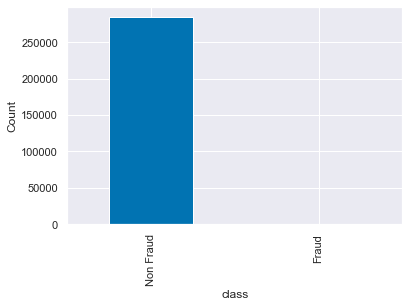

In [9]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
count= df['class'].value_counts()
count.plot(kind='bar')
plt.xticks(range(2),['Non Fraud','Fraud'])
plt.xlabel('class')
plt.ylabel('Count')
plt.show()


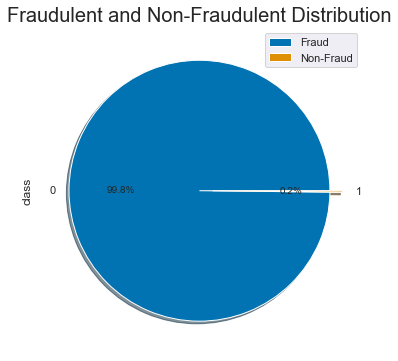

In [10]:
df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Fraudulent and Non-Fraudulent Distribution",fontsize=20)
plt.legend(["Fraud", "Non-Fraud"])
plt.show()

**Insights**

This dataset has 492 frauds out of 284,315 transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis, our algorithms will probably overfit since it will "assume" that most transactions are not a fraud. But we don't want our model to assume, we want our model to detect patterns that give signs of fraud!

In [11]:
df[['time','amount']].describe()

,time,amount
count,284807.000000,284807.000000
mean,94813.859575,88.349619
std,47488.145955,250.120109
min,0.000000,0.000000
25%,54201.500000,5.600000
50%,84692.000000,22.000000
75%,139320.500000,77.165000
max,172792.000000,25691.160000


**Insights**

* On an average, credit card transaction is happening at every 94813.86 seconds.
* Average transaction amount is 88.35 with a standard deviation of 250, with a minimum amount of 0.0 and the maximum amount 25,691.16. By seeing the 75% and the maximum amount, it looks like the feature 'Amount' is highly ** positively skewed**. We will check the distribution graph of the amount to get more clarity.
* There are no missing values present in the dataset. It is not necessary that missing values are present in the dataset in the form of  NA, NAN, Zeroes etc, it may be present by some other values also that can be explored by analysing each feature.

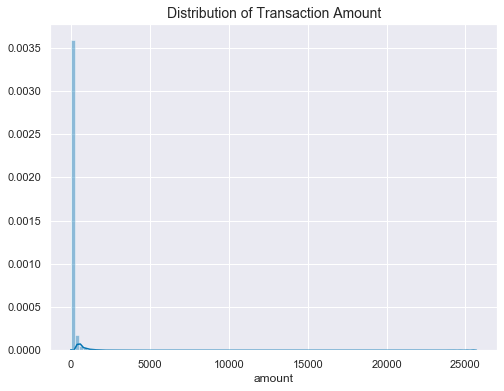

In [12]:
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Amount', fontsize=14)
sns.distplot(df['amount'], bins=100)
plt.show()

**Insights**

* Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme.

* Most daily transactions are not extremely expensive, but it’s likely where most fraudulent transactions are occurring as well.

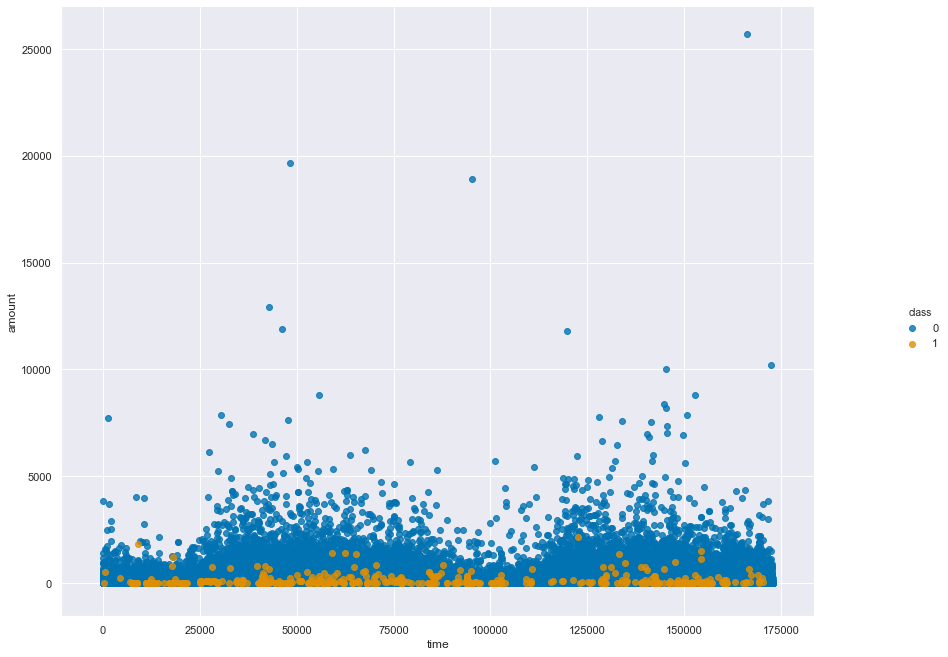

In [13]:
#2-D Scatter Plot
# Create a scatter plot to observe the distribution of classes with time and Amount
sns.lmplot('time', 'amount',df, hue='class', fit_reg=False)
fig = plt.gcf()
fig.set_size_inches(15, 10)
plt.show()

#### Insights:

1. From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.
2. As per with the time, the frauds in the transactions are evenly distributed throughout time.

In [14]:
print("Fraud Transaction distribution : \n",df[(df['class'] == 1)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].max())
print("Minimum amount of fraud transaction - ",df[(df['class'] == 1)]['amount'].min())

Fraud Transaction distribution : 
 1.00     113
0.00      27
99.99     27
0.76      17
0.77      10
Name: amount, dtype: int64


Maximum amount of fraud transaction -  2125.87
Minimum amount of fraud transaction -  0.0


**Insights**

* There are 113 fraud transactions for just one dollor and 27 fraud transaction for $99.99. And higest fraud transaction amount was 2125.87 and lowest was just 0.00.
* There are 27 fraud transaction for zero amount. Zero Authorization is an account verification method for credit cards that is used to verify a cardholders information without charging the consumer. Instead, an amount of zero is charged on the card to store the credit card information in the form of a token and to determine whether the card is legitimate or not. After creating the token, is then possible to charge the consumer with a new transaction with either Tokenization or Recurring Payments

In [15]:
print("Non - Fraudulent Transaction distribution : \n",df[(df['class'] == 0)]['amount'].value_counts().head())
print("\n")
print("Maximum amount of Non-Fraud transaction - ",df[(df['class'] == 0)]['amount'].max())
print("Minimum amount of Non-Fraud transaction - ",df[(df['class'] == 0)]['amount'].min())

Non - Fraudulent Transaction distribution : 
 1.00     13575
1.98      6044
0.89      4872
9.99      4746
15.00     3280
Name: amount, dtype: int64


Maximum amount of Non-Fraud transaction -  25691.16
Minimum amount of Non-Fraud transaction -  0.0


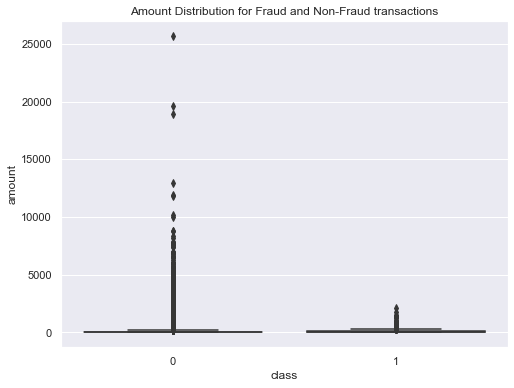

In [16]:
#Distribution of Amount w.r.t Class
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='amount',data = df)
plt.title('Amount Distribution for Fraud and Non-Fraud transactions')
plt.show()

**Insights**

* Most the transaction amount falls between 0 and about 3000 and we have some outliers for really big amount transactions and it may actually make sense to drop those outliers in our analysis if they are just a few points that are very extreme. Also, we should be conscious about that these **outliers should not be the fraudulent transaction**. Generally, fraudulent transactions of the very big amount and removing them from the data can make the predicting model bais. 

* So we can essentially build a model that realistically predicts transaction as fraud without affected by outliers. It may not be really useful to actually have our model train on these extreme outliers.

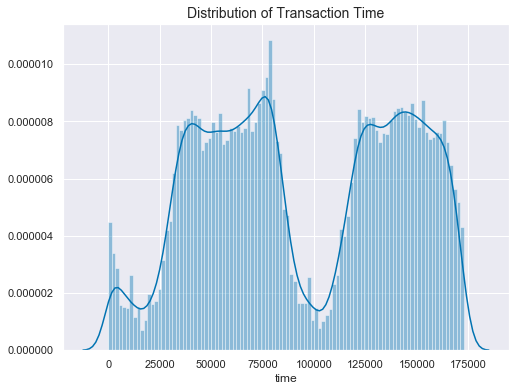

In [17]:
#Distribution of Time w.r.t Class
plt.figure(figsize=(8,6))
plt.title('Distribution of Transaction Time', fontsize=14)
sns.distplot(df['time'], bins=100)
plt.show()

**Insights**

* By seeing the graph, we can see there are two peaks in the graph and even there are some local peaks.
* We can think of these as the time of the day like the peak is the day time when most people do the transactions and the depth is the night time when most people just sleeps. We already know that data contains a credit card transaction for only two days, so there are two peaks for day time and one depth for one night time.

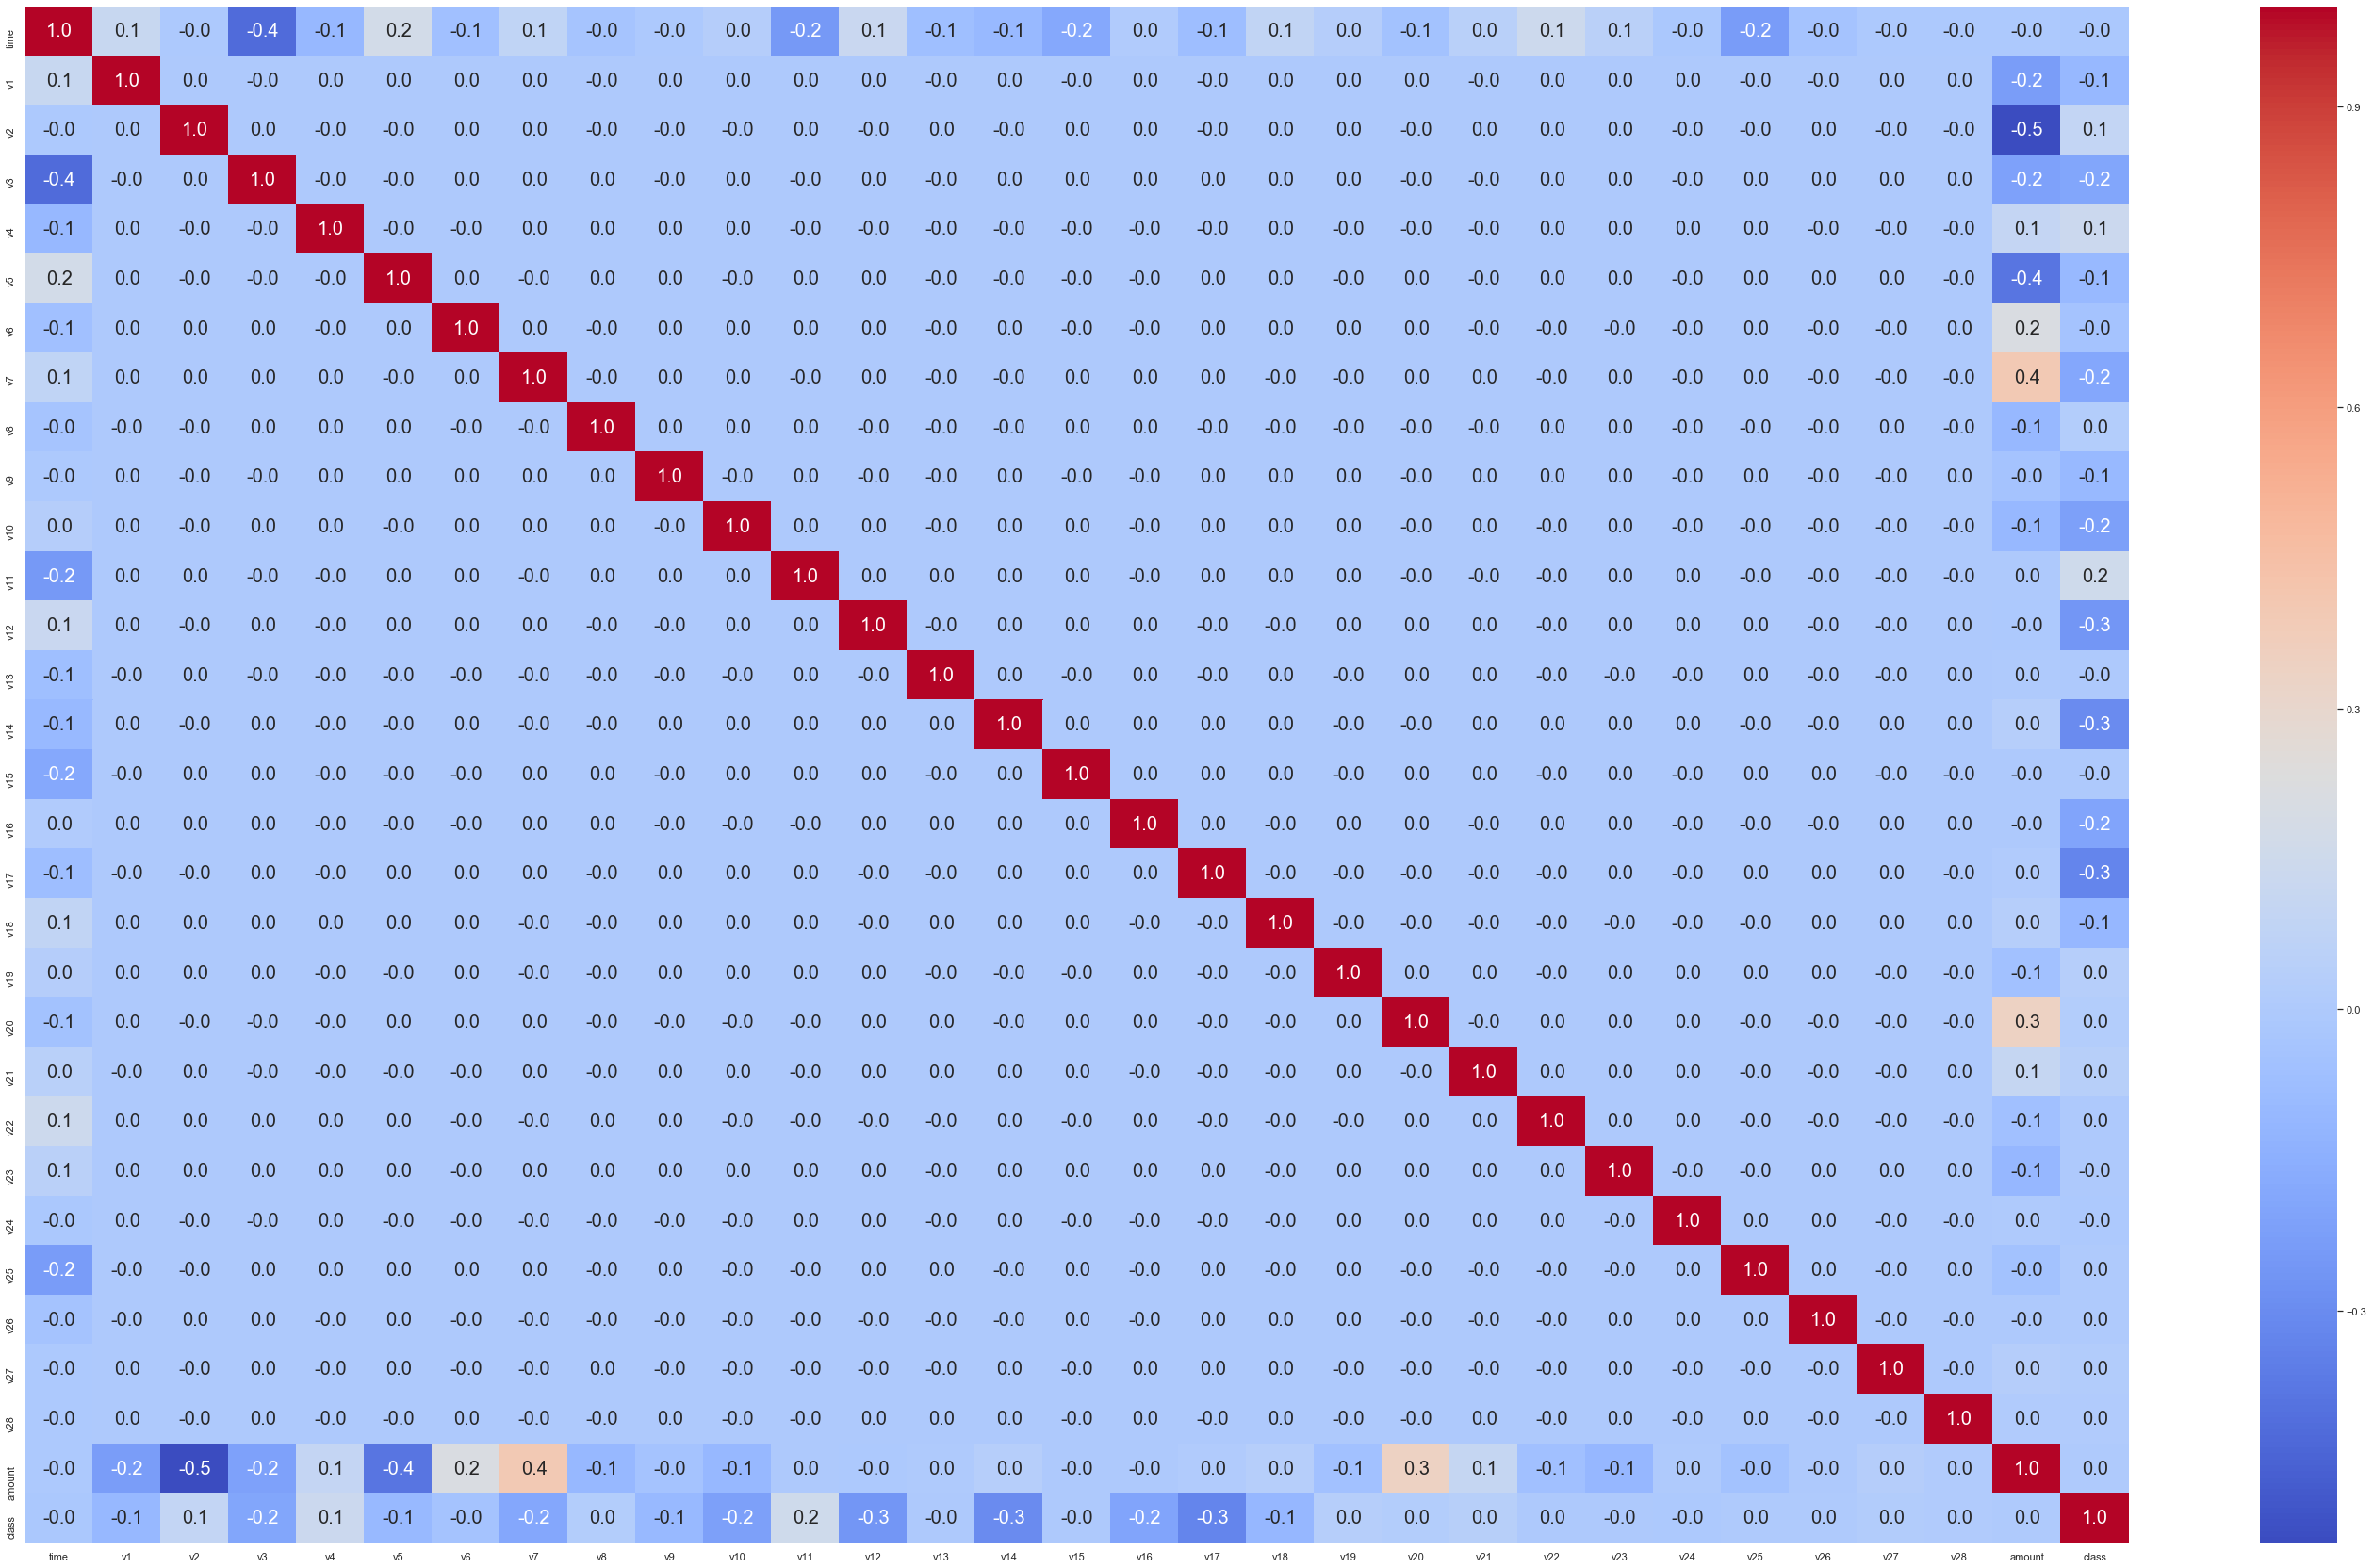

In [18]:
## Correlation
#import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(50,30))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='coolwarm', fmt=".1f",annot_kws={'size':20})

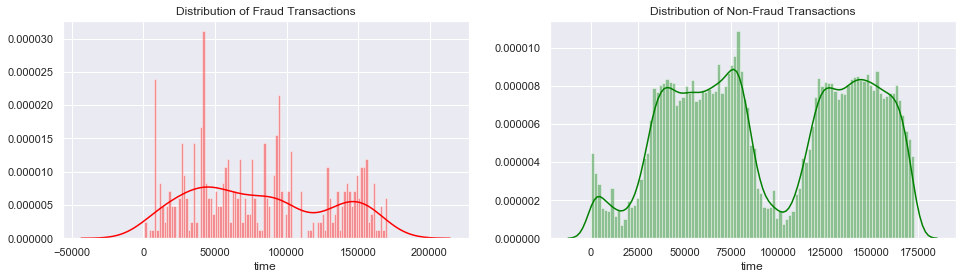

In [19]:
#Distribution of time w.r.t. transactions types
fig, axs = plt.subplots(ncols=2, figsize=(16,4))

sns.distplot(df[(df['class'] == 1)]['time'], bins=100, color='red', ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.distplot(df[(df['class'] == 0)]['time'], bins=100, color='green', ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

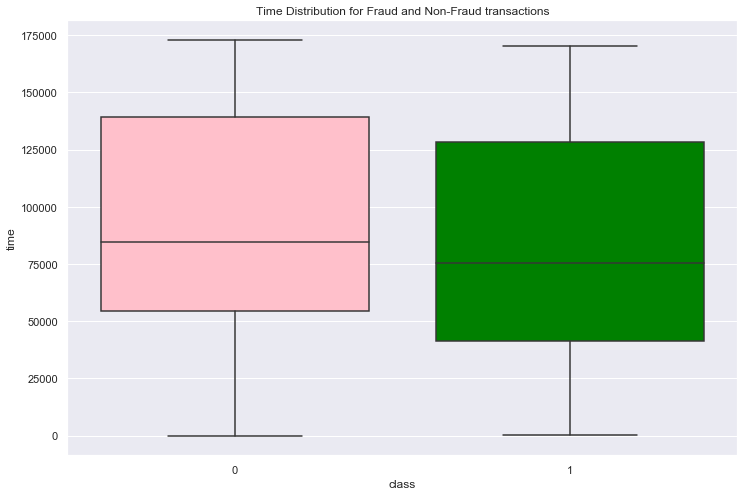

In [20]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x='class', y='time',data = df)
ax.artists[0].set_facecolor('pink')
ax.artists[1].set_facecolor('green')

plt.title('Time Distribution for Fraud and Non-Fraud transactions')
plt.show()

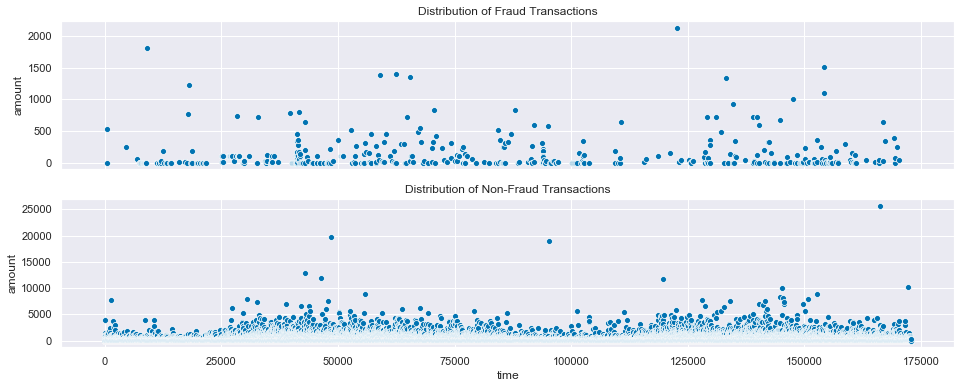

In [21]:
# Distribution of transaction type w.r.t amount
fig, axs = plt.subplots(nrows=2,sharex=True,figsize=(16,6))

sns.scatterplot(x='time',y='amount', data=df[df['class']==1], ax=axs[0])
axs[0].set_title("Distribution of Fraud Transactions")

sns.scatterplot(x='time',y='amount', data=df[df['class']==0], ax=axs[1])
axs[1].set_title("Distribution of Non-Fraud Transactions")

plt.show()

In [22]:
# Finding unique values for each column
df[['time','amount','class']].nunique()

time      124592
amount     32767
class          2
dtype: int64

- Having too many features in a model is not always a good thing because it might cause overfitting and worse results when we want to predict values for a new dataset. Thus, if a feature does not improve your model a lot, not adding it may be a better choice.

- Another important thing is correlation. If there is a very high correlation between two features, keeping both of them is not a good idea most of the time not to cause overfitting. However, this does not mean that you must remove one of the highly correlated features.

- We can find out top 10 features which are highly correlated with a price.

In [23]:
df[['time','amount','class']].corr()['class'].sort_values(ascending=False).head(10)

class     1.000000
amount    0.005632
time     -0.012323
Name: class, dtype: float64

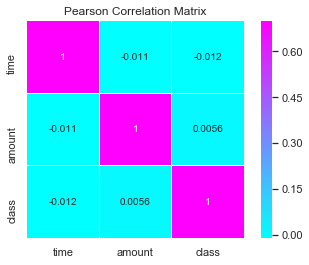

In [24]:
plt.title('Pearson Correlation Matrix')
sns.heatmap(df[['time', 'amount','class']].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="cool",
            linecolor='w',annot=True);

**Insights**

- It looks like that no features are highly correlated with any other features.

In [25]:
# Lets check the data again after cleaning

df['class'].value_counts(normalize=True)

0    0.998273
1    0.001727
Name: class, dtype: float64

In [26]:
df.shape

(284807, 31)

#### Feature Engineering

In [27]:
#Converting time from second to hour
df['time'] = df['time'].apply(lambda sec : (sec/3600))

In [28]:
# Calculating hour of the day
df['hour'] = df['time']%24   # 2 days of data
df['hour'] = df['hour'].apply(lambda x : math.floor(x))

In [29]:
# Calculating First and Second day
df['day'] = df['time']/24   # 2 days of data
df['day'] = df['day'].apply(lambda x : 1 if(x==0) else math.ceil(x))

In [30]:
df[['time','hour','day','amount','class']]

,time,hour,day,amount,class
0,0.000000,0,1,149.62,0
1,0.000000,0,1,2.69,0
2,0.000278,0,1,378.66,0
3,0.000278,0,1,123.50,0
4,0.000556,0,1,69.99,0
...,...,...,...,...,...
284802,47.996111,23,2,0.77,0
284803,47.996389,23,2,24.79,0
284804,47.996667,23,2,67.88,0
284805,47.996667,23,2,10.00,0


In [31]:
# Fraud and Non-Fraud transaction Day wise
# calculating fraud transaction daywise
dayFrdTran = df[(df['class'] == 1)]['day'].value_counts()

# calculating genuine transaction daywise
dayNFrdTran = df[(df['class'] == 0)]['day'].value_counts()

# calculating total transaction daywise
dayTran = df['day'].value_counts()

print("No of transaction Day wise:")
print(dayTran)

print("\n")

print("No of fraud transaction Day wise:")
print(dayFrdTran)

print("\n")

print("No of non-fraud transactions Day wise:")
print(dayNFrdTran)

print("\n")

print("Percentage of fraud transactions Day wise:")
print((dayFrdTran/dayTran)*100)

No of transaction Day wise:
1    144787
2    140020
Name: day, dtype: int64


No of fraud transaction Day wise:
1    281
2    211
Name: day, dtype: int64


No of non-fraud transactions Day wise:
1    144506
2    139809
Name: day, dtype: int64


Percentage of fraud transactions Day wise:
1    0.194078
2    0.150693
Name: day, dtype: float64


**Highlights**

* Total number of transaction on Day 1 was 144787, out of which 281 was a fraud and 144506 was genuine. Fraud transaction was 0.19% of the total transaction on day 1.

* Total number of transaction on Day 2 was 140020, out of which 211 was a fraud and 139809 was genuine. Fraud transaction was 0.15% of the total transaction on day 2.

* Most of the transaction including the fraud transaction happened on day 1.

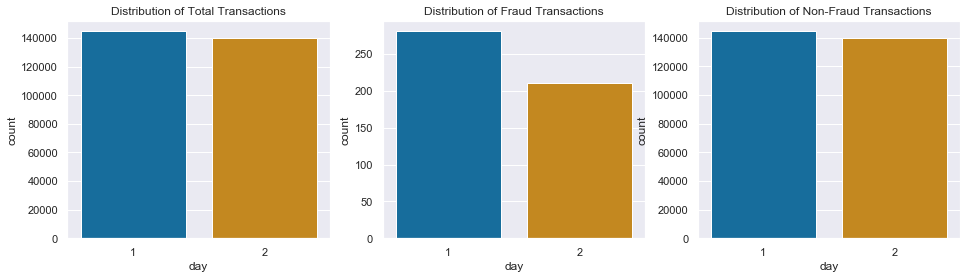

In [32]:
fig, axs = plt.subplots(ncols=3, figsize=(16,4))

sns.countplot(df['day'], ax=axs[0])
axs[0].set_title("Distribution of Total Transactions")

sns.countplot(df[(df['class'] == 1)]['day'], ax=axs[1])
axs[1].set_title("Distribution of Fraud Transactions")

sns.countplot(df[(df['class'] == 0)]['day'], ax=axs[2])
axs[2].set_title("Distribution of Non-Fraud Transactions")

plt.show()

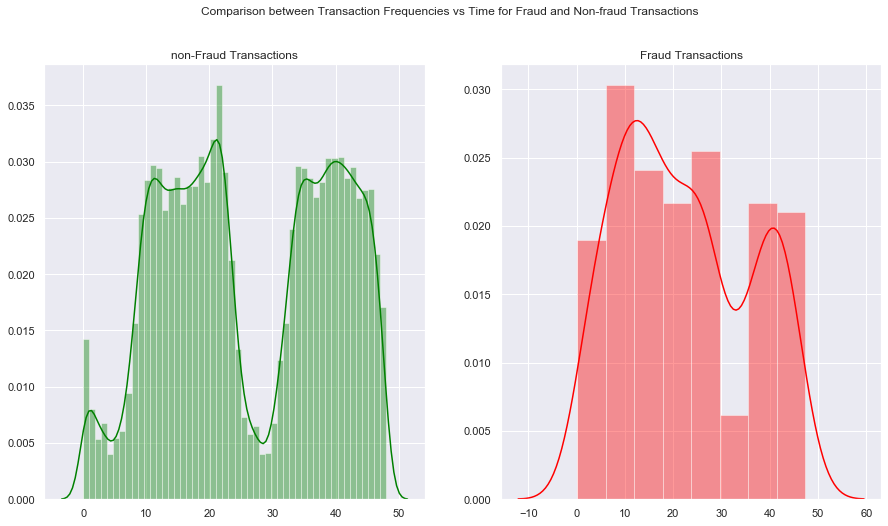

In [33]:
# Time plots 
fig , axs = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15,8))

sns.distplot(df[df['class']==0]['time'].values , color = 'green' , ax = axs[0])
axs[0].set_title('non-Fraud Transactions')

sns.distplot(df[df['class']==1]['time'].values , color = 'red' ,ax = axs[1])
axs[1].set_title('Fraud Transactions')

fig.suptitle('Comparison between Transaction Frequencies vs Time for Fraud and Non-fraud Transactions')
plt.show()

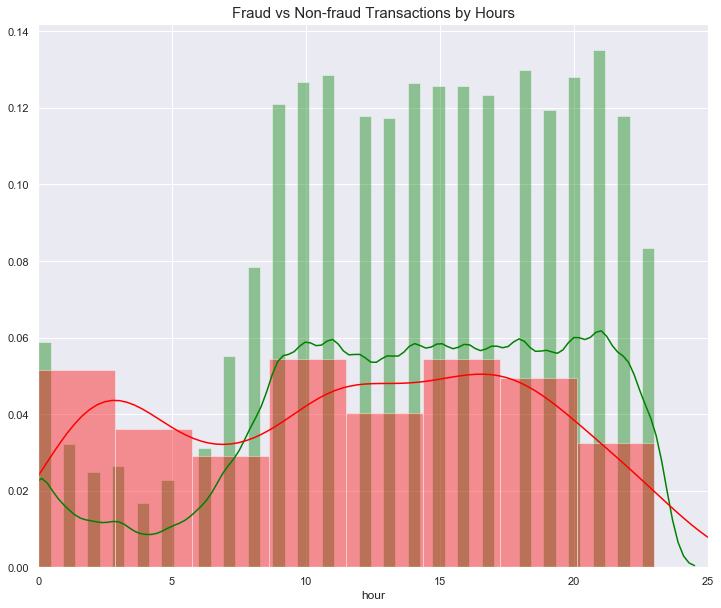

In [34]:
# Let's see if we find any particular pattern between time ( in hours ) and Fraud vs Non-fraud Transactions

plt.figure(figsize=(12,10))

sns.distplot(df[df['class'] == 0]["hour"], color='green') # Genuine - green
sns.distplot(df[df['class'] == 1]["hour"], color='red') # Fraudulent - Red

plt.title('Fraud vs Non-fraud Transactions by Hours', fontsize=15)
plt.xlim([0,25])
plt.show()

**Insights**

- Above graph shows that most of the Fraud transactions are happening at night time (0 to 7 hours) when most of the people are sleeping and Genuine transaction are happening during day time (9 to 21 hours).

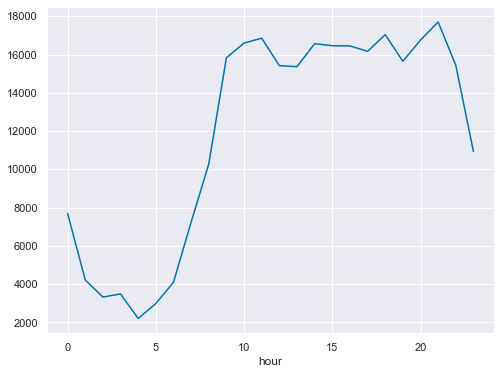

In [35]:
plt.figure(figsize=(8,6))
df[['time','hour','day','amount','class']].groupby('hour').count()['class'].plot()
plt.show()

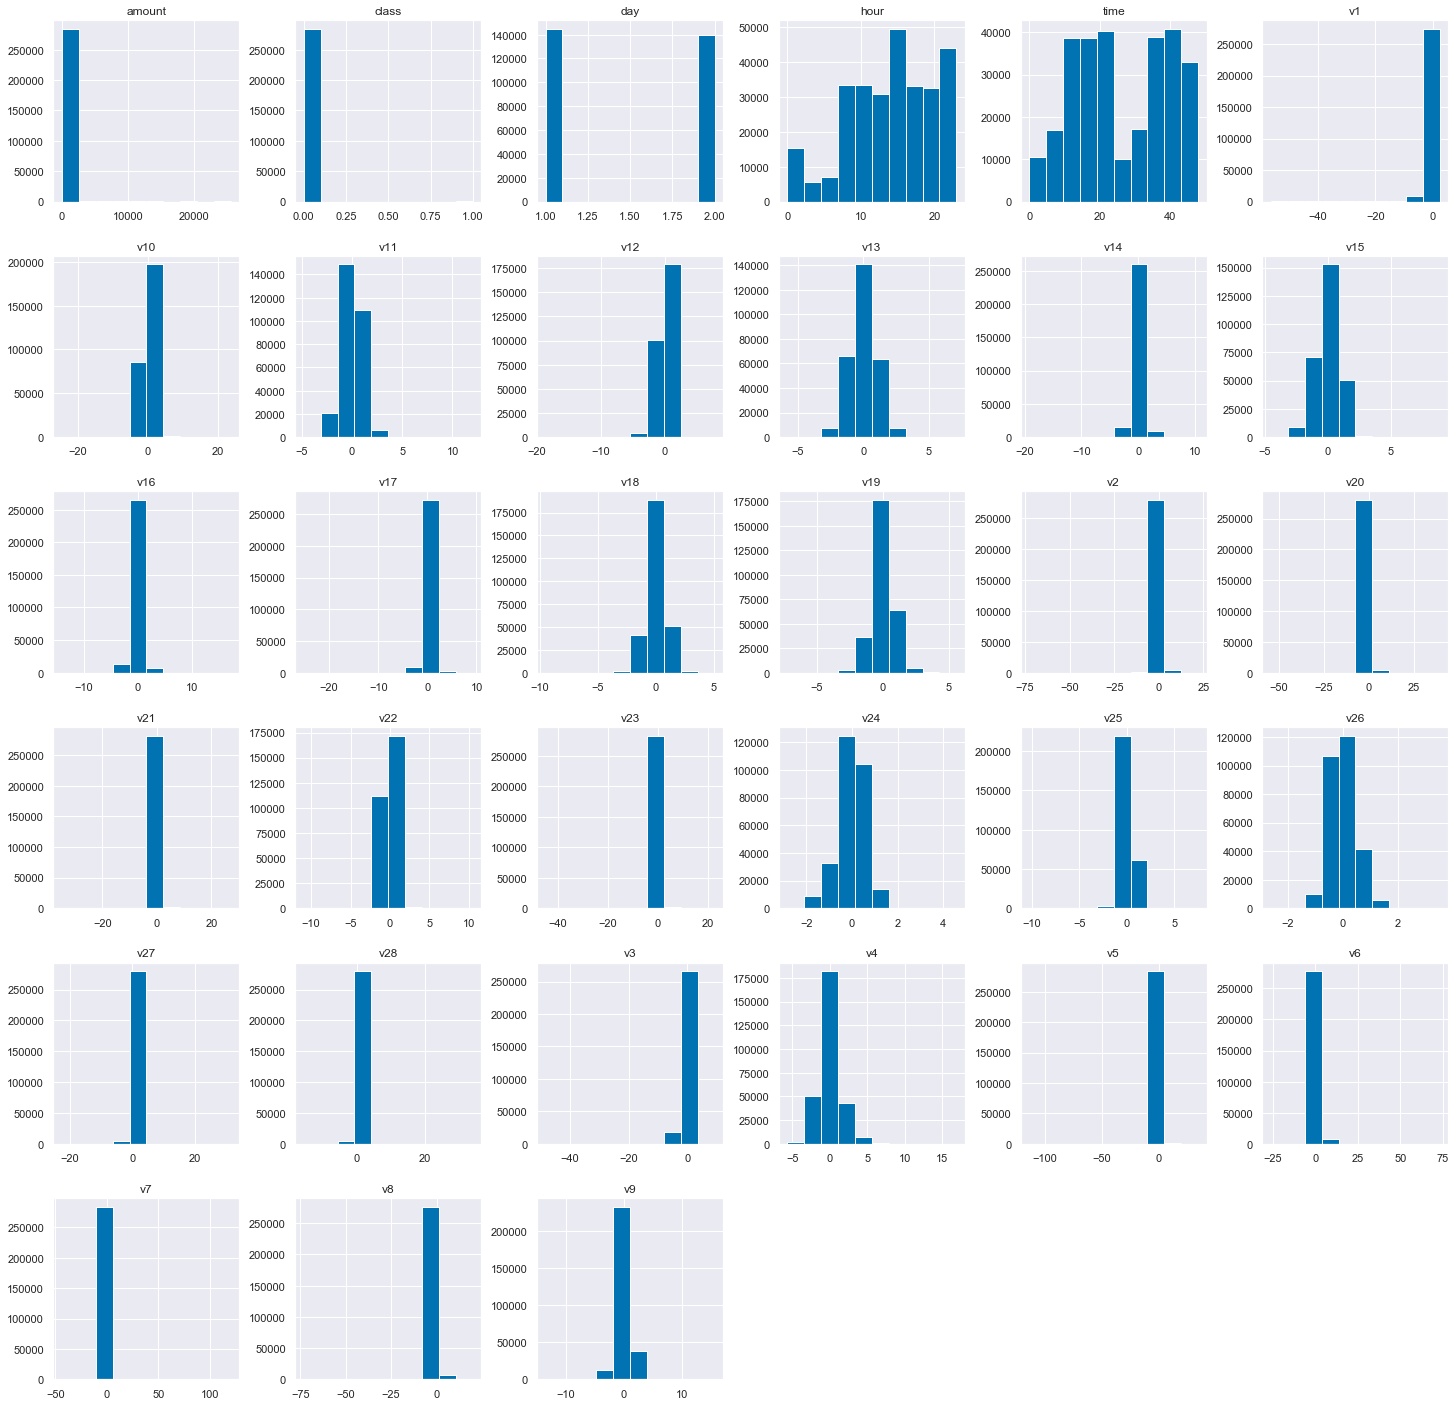

In [36]:
#Visualising Data for detecting any particular Pattern or Anomaly using Histogram Plots
df.hist(figsize = (25,25))
plt.show()

In [37]:
df.reset_index(inplace = True , drop = True)

#### <a id='scaleamount'>Scale Amount Feature</a>

* It is a good idea to scale the data so that the column(feature) with lesser significance might not end up dominating the objective function due to its larger range. like a column like age has a range between 0 to 80, but a column like a salary has ranged from thousands to lakhs, hence, salary column will dominate to predict the outcome even if it may not be important.
* In addition, features having different unit should also be scaled thus providing each feature equal initial weightage. Like Age in years and Sales in Dollars must be brought down to a common scale before feeding it to the ML algorithm
* This will result in a better prediction model.

**PCA Transformation**: The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) except for time and amount.

**Scaling**: Keep in mind that in order to implement a PCA transformation features need to be previously scaled.

In [38]:
# Scale amount by log
df['amount_log'] = np.log(df.amount + 0.01)

In [39]:
#Scale amount by Standardization
from sklearn.preprocessing import StandardScaler # importing a class from a module of a library
ss = StandardScaler() # object of the class StandardScaler ()
df['amount_scaled'] = ss.fit_transform(df['amount'].values.reshape(-1,1))

In [40]:
#Scale amount by Normalization
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler() # object of the class StandardScaler ()
df['amount_minmax'] = mm.fit_transform(df['amount'].values.reshape(-1,1))

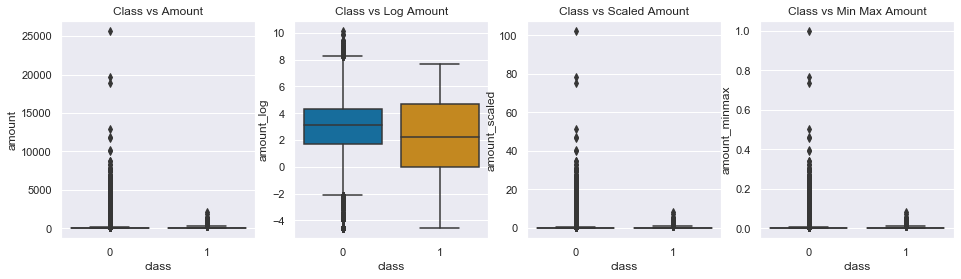

In [41]:
#Feature engineering to a better visualization of the values

# Let's explore the Amount by Class and see the distribuition of Amount transactions
fig , axs = plt.subplots(nrows = 1 , ncols = 4 , figsize = (16,4))

sns.boxplot(x ="class",y="amount",data=df, ax = axs[0])
axs[0].set_title("Class vs Amount")

sns.boxplot(x ="class",y="amount_log",data=df, ax = axs[1])
axs[1].set_title("Class vs Log Amount")

sns.boxplot(x ="class",y="amount_scaled",data=df, ax = axs[2])
axs[2].set_title("Class vs Scaled Amount")

sns.boxplot(x ="class",y="amount_minmax",data=df, ax = axs[3])
axs[3].set_title("Class vs Min Max Amount")

plt.show()

**Insights**

* We can see a slight difference in the log amount of our two Classes. 
* The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have the highest values.
* **By seeing the above three graphs, We think scaling the amount by log will best suit for our model.**

In [42]:
df[['time','hour','day','amount','amount_log','amount_scaled','amount_minmax','class']]

,time,hour,day,amount,amount_log,amount_scaled,amount_minmax,class
0,0.000000,0,1,149.62,5.008166,0.244964,0.005824,0
1,0.000000,0,1,2.69,0.993252,-0.342475,0.000105,0
2,0.000278,0,1,378.66,5.936665,1.160686,0.014739,0
3,0.000278,0,1,123.50,4.816322,0.140534,0.004807,0
4,0.000556,0,1,69.99,4.248495,-0.073403,0.002724,0
...,...,...,...,...,...,...,...,...
284802,47.996111,23,2,0.77,-0.248461,-0.350151,0.000030,0
284803,47.996389,23,2,24.79,3.210844,-0.254117,0.000965,0
284804,47.996667,23,2,67.88,4.217889,-0.081839,0.002642,0
284805,47.996667,23,2,10.00,2.303585,-0.313249,0.000389,0


In [43]:
df.shape

(284807, 36)

#### <a id='splitdata'>Splitting data into Training and Testing samples</a>

We don't use the full data for creating the model. Some data is randomly selected and kept aside for checking how good the model is. This is known as Testing Data and the remaining data is called Training data on which the model is built. Typically 70% of data is used as training data and the rest 30% is used as testing data.

In [44]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class', 'hour', 'day', 'amount_log', 'amount_scaled', 'amount_minmax'],
      dtype='object')

**Highlights**

* We have created few new features like an hour, day, scaled amount. However, these are just for visualization purpose only, not for building the model.

In [45]:
# Separate Target Variable and Predictor Variables
# Here we keep the log amount and drop the amount and scaled amount columns.
X = df.drop(['time','class','hour','day','amount','amount_minmax','amount_scaled'],axis=1)
y = df['class']

In [46]:
X

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,v11,v12,v13,v14,v15,v16,v17,v18,v19,v20,v21,v22,v23,v24,v25,v26,v27,v28,amount_log
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,5.008166
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.993252
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,5.936665
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,4.816322
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,4.248495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.248461
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,3.210844
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,4.217889
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,2.303585


In [47]:
# Load the library for splitting the data
from sklearn.model_selection import train_test_split
# Split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=101)


In [48]:
# Quick sanity check with the shapes of Training and testing datasets
print("X_train - ",X_train.shape)
print("y_train - ",y_train.shape)
print("X_test - ",X_test.shape)
print("y_test - ",y_test.shape)

X_train -  (199364, 29)
y_train -  (199364,)
X_test -  (85443, 29)
y_test -  (85443,)


### <a id='modelbaseline'>Baseline for models</a>

We will train four types of classifiers and decide which classifier will be more effective in detecting **fraud transactions**.

1  __Classification Models__

- Logistic Regression
- Decision Trees
- Random Forest
- Naive Bayes Classifier 

2  __Class Imbalance Solutions__

- Under Sampling
- Over Sampling
- SMOTE
- ADASYN

3  __Metrics__

- Accuracy Score
- Confusion Matrix
- Precision Score
- Recall Score
- ROC_AUC
- F1 Score

## <a id='modelbuild'>Model Building</a>

**We are aware that our dataset is highly imbalanced, however, we check the performance of imbalance dataset first and later we implement some techniques to balance the dataset and again check the performance of balanced dataset. Finally, we will compare each regression models performance.**

### <a id='logreg'>1.Logistic Regression with imbalanced data</a>

In [49]:
from sklearn.linear_model import LogisticRegression # Importing Classifier Step
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0) 

logreg = LogisticRegression()
logreg.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##### Predict from Test set

In [50]:
y_pred = logreg.predict(X_test)

##### Model Evalution

In [51]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.89      0.63      0.74       147

    accuracy                           1.00     85443
   macro avg       0.95      0.81      0.87     85443
weighted avg       1.00      1.00      1.00     85443



In [52]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))
# print('Confusion Matrix : \n', cnf_matrix)
print("\n")

Accuracy :0.99923
AUC : 0.81286
Precision : 0.89320
Recall : 0.62585
F1 : 0.73600




In [53]:
# Predicted values counts for fraud and genuine of test dataset
pd.Series(y_pred).value_counts()

0    85340
1      103
dtype: int64

**Insights**

- Our model predicted 103 transactions as fraud and 85340 transactions as genuine from the test dataset.

In [54]:
# Actual values counts for fraud and genuine of test dataset
pd.Series(y_test).value_counts()

0    85296
1      147
Name: class, dtype: int64

**There are originally 147 fraud transactions and our model predicted only 103 fraud transaction. So the accuracy of our model should be ${103}\over{147}$**

In [55]:
103/147

0.7006802721088435

- So 71.533% should be our accuracy.

- However, this not the case. Actually there are originally 147 fraud transactions and 85296 genuine transactions in the test dataset. However, our model predicted only 103 fraud transaction. Also, it should be kept in mind that these 103 predicted fraud transaction may not be identified correctly. It means that these predicted 103 fraud transactions are NOT only from 147 originally fraud transaction, but they may also be from genuine transactions as well.


#### Confusion Matrix

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

array([[85285,    11],
       [   55,    92]], dtype=int64)

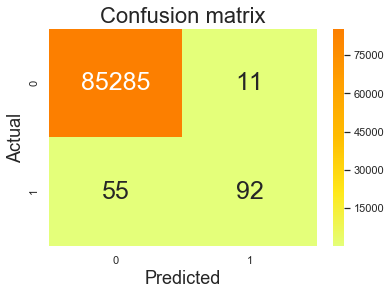

In [57]:
# Heatmap for Confusion Matrix
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap='Wistia' ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.ylabel('Actual',fontsize = 18)
plt.xlabel('Predicted',fontsize = 18)

plt.show()

**There are 84 transaction recognised as True Postive, means they are orignally fraud transactions and our model precited them as fraud.**

**True Negative** - 85285 (truely saying negative - Non-fraud transaction correctly identified as genuine)

**True Postive** - 92 (truely saying positive - fraud transaction correctly identified as fraud)

**False Negative** - 55 ( falsely saying negative - fraud transaction incorrectly identified as genuine)

**False Positive** - 11 ( falsely saying positive - Non-fraud transaction incorrectly identified as fraud)


**We already know that we have 147 fraud transaction in our test dataset, but our model predicted only 92 fraud transaction. So the real accuracy of our model is ${92}\over{147}$**

In [58]:
92/147

0.6258503401360545

**Insights:**

So, **62.59%** is the real accuracy of our model, which is nothing but the **Recall Score**. So we have the emphasis on Recall score and F1 score to measure the performance of our model, not the accuracy.

#### ROC Curve


In [59]:
metrics.roc_auc_score(y_test , y_pred) 

0.8128606887324429

In [60]:
y_pred_proba = logreg.predict_proba(X_test)
y_pred_proba

array([[9.99449741e-01, 5.50258517e-04],
       [9.99633653e-01, 3.66346923e-04],
       [9.99508178e-01, 4.91821895e-04],
       ...,
       [9.99395206e-01, 6.04794303e-04],
       [9.99803877e-01, 1.96122683e-04],
       [9.99022139e-01, 9.77860650e-04]])

AUC -  0.8128606887324429 



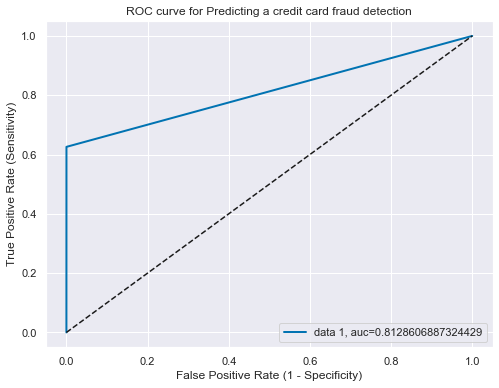

In [61]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### Import imbalace technique algorithims

In [62]:
# Import imbalace technique algorithims
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler

#### <a id='logregundsamp'>1.2.Logistic Regression with Random Undersampling technique</a>

In [63]:
from collections import Counter # counter takes values returns value_counts dictionary
from sklearn.datasets import make_classification

In [64]:
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, shuffle=True, random_state=0)

# Undersampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [66]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.94595
AUC : 0.94608
Precision : 0.96503
Recall : 0.92617
F1 : 0.94521


AUC -  0.9460804456010592 



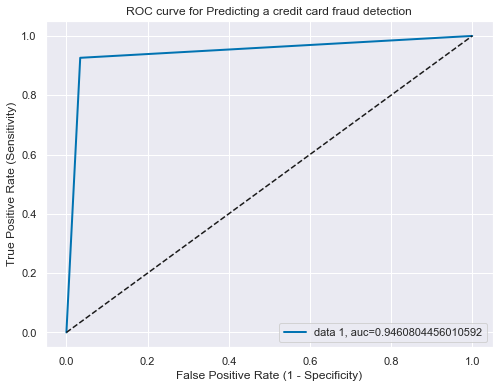

In [67]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a credit card fraud detection')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

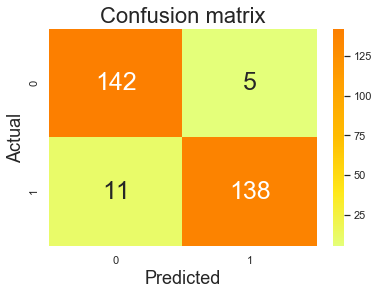

In [68]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap='Wistia' ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)


plt.show()

#### <a id='logregovrsamp'>1.3.Logistic Regression with Random Oversampling technique</a>

In [69]:
from imblearn.over_sampling import RandomOverSampler
print('Original dataset shape %s' % Counter(y))
random_state = 42

ros = RandomOverSampler(random_state=random_state)
X_res, y_res = ros.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, shuffle=True, random_state=0)

# Oversampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [71]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.94523
AUC : 0.94527
Precision : 0.97444
Recall : 0.91461
F1 : 0.94358


AUC -  0.9452749803056485 



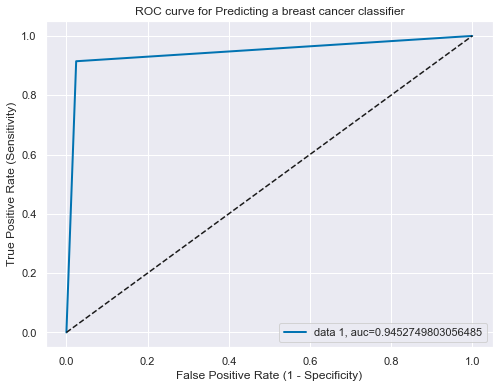

In [72]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

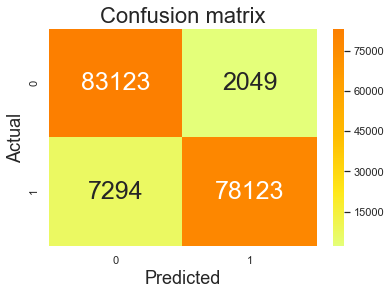

In [73]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap='Wistia' ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### <a id='logregsomote'>1.4 Logistic Regression with SMOTE data</a>

In [74]:
from imblearn.over_sampling import SMOTE, ADASYN
print('Original dataset shape %s' % Counter(y))

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, shuffle=True, random_state=0)

# SMOTE Sampling with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [76]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_test , y_pred))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.94511
AUC : 0.94516
Precision : 0.97330
Recall : 0.91550
F1 : 0.94352


AUC -  0.9451562911273197 



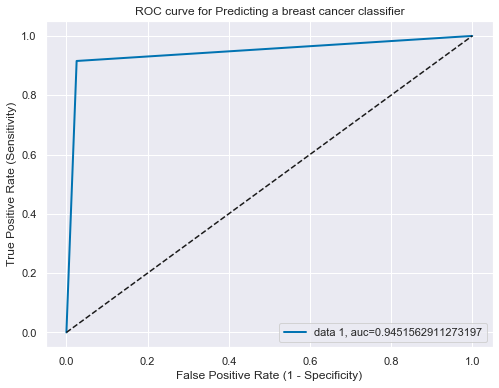

In [77]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

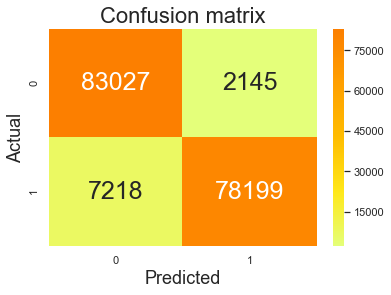

In [78]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap='Wistia' ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

#### <a id='logregadasyn'>1.5 Logistic Regression with ADASYN data</a>

In [79]:
print('Original dataset shape %s' % Counter(y))

adasyn = ADASYN(random_state=42)

X_res, y_res = adasyn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({1: 284318, 0: 284315})


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, shuffle=True, random_state=0)

#  ADASYN Sampling with Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [81]:
print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(y_pred , y_test))) 
print('AUC : {0:0.5f}'.format(metrics.roc_auc_score(y_test , y_pred)))
print('Precision : {0:0.5f}'.format(metrics.precision_score(y_test , y_pred)))
print('Recall : {0:0.5f}'.format(metrics.recall_score(y_test , y_pred)))
print('F1 : {0:0.5f}'.format(metrics.f1_score(y_test , y_pred)))

Accuracy :0.87999
AUC : 0.88001
Precision : 0.90034
Recall : 0.85479
F1 : 0.87697


AUC -  0.8800121853145373 



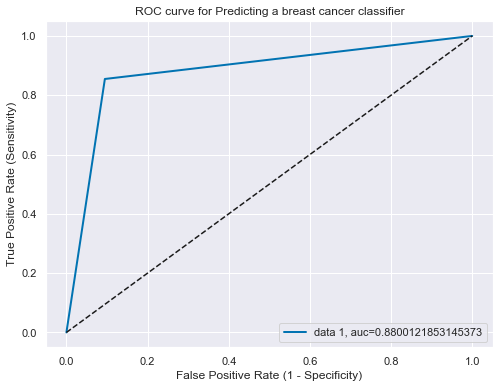

In [82]:
# plot ROC Curve

plt.figure(figsize=(8,6))

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

auc = metrics.roc_auc_score(y_test, y_pred)
print("AUC - ",auc,"\n")

plt.plot(fpr,tpr,linewidth=2, label="data 1, auc="+str(auc))
plt.legend(loc=4)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12
plt.title('ROC curve for Predicting a breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

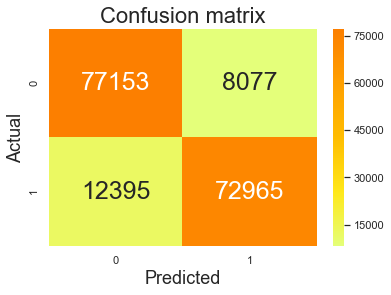

In [83]:
# Heatmap for Confusion Matrix

cnf_matrix = metrics.confusion_matrix(y_test , y_pred)
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, annot_kws={"size": 25}, cmap='Wistia' ,fmt='g')

plt.title('Confusion matrix', y=1.1, fontsize = 22)
plt.xlabel('Predicted',fontsize = 18)
plt.ylabel('Actual',fontsize = 18)

plt.show()

**Insights**

- We have seen that imbalance dataset have Recall score of only 62.59%. It means that creating a model from the imbalanced dataset is highly biased towards genuine transactions and creates a model which is not able to predict the fraudulent transactions correctly. However, the balanced dataset has Recall score of above 85.48%.

We will reduce 29 columns to 2 columns with the help of Principal Component Analysis so that We can look at them in a plot! (because to plot graph we need two dimensions)

In [84]:
from sklearn.decomposition import PCA

In [85]:
X_reduced_pca_im = PCA(n_components=2, random_state=42).fit_transform(X)

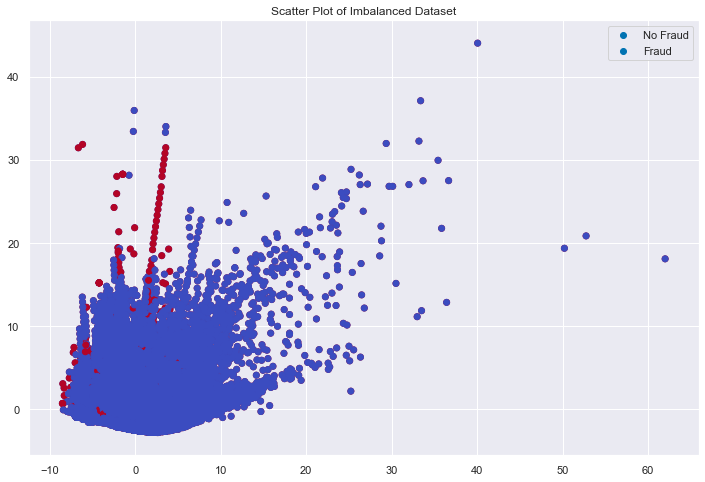

In [86]:
# Generate and plot a synthetic imbalanced classification dataset
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y == 0), label='No Fraud', cmap='coolwarm', linewidths=1)
plt.scatter(X_reduced_pca_im[:,0], X_reduced_pca_im[:,1], c=(y == 1), label='Fraud', cmap='coolwarm', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset")
plt.legend()
plt.show()

In [87]:
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X_res)

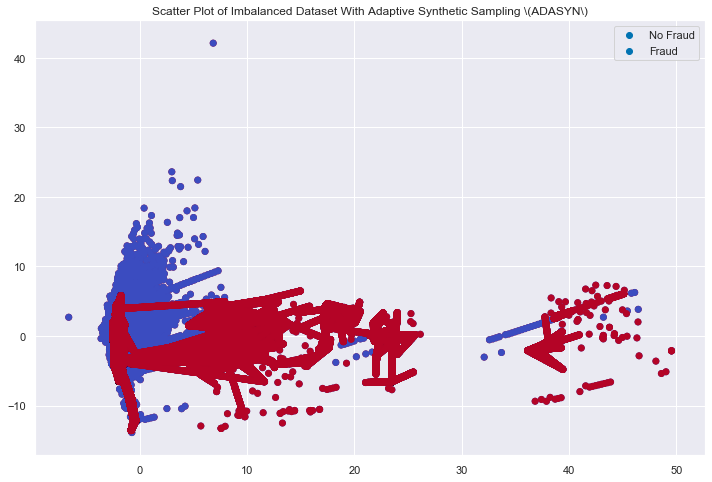

In [88]:
# Oversample and plot imbalanced dataset with ADASYN
plt.figure(figsize=(12,8))

plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 0), cmap='coolwarm', label='No Fraud', linewidths=1)
plt.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y_res == 1), cmap='coolwarm', label='Fraud', linewidths=1)

plt.title("Scatter Plot of Imbalanced Dataset With Adaptive Synthetic Sampling \(ADASYN\)")
plt.legend()
plt.show()

### <a id='modelwith'>Building different models with different balanced datasets</a>
Let's now try different models , first by creating multiple datasets for undersampled , oversampled and SMOTE sampled

#### <a id='usdata'>1. Undersampled Data</a>

In [89]:
print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_under))

# Slit into train and test datasets
X_train_under, X_test_under, y_train_under, y_test_under = train_test_split(X_under, y_under, shuffle=True, test_size=0.3, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 492, 1: 492})


#### <a id='osdata'>2. Oversampled Data</a>

In [90]:
print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_over))

# Slit into train and test datasets
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over, y_over, test_size=0.3, shuffle=True, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


#### <a id='smotedata'>3. SMOTE Data</a>

In [91]:
print('Original dataset shape %s' % Counter(y))

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_smote))

# Slit into train and test datasets
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, y_smote, test_size=0.3, shuffle=True, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 284315, 1: 284315})


#### <a id='adasyndata'>4. ADASYN Data</a>

In [92]:
print('Original dataset shape %s' % Counter(y))

adasyn = ADASYN(random_state=42)
X_adasyn, y_adasyn = adasyn.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_adasyn))

# Slit into train and test datasets
X_train_adasyn, X_test_adasyn, y_train_adasyn, y_test_adasyn = train_test_split(X_adasyn, y_adasyn, test_size=0.3, shuffle=True, random_state=0)

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({1: 284318, 0: 284315})


In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [94]:
names_lst = []

# Empty list to capture performance matrix for train set
aucs_train_lst = []
accuracy_train_lst = []
precision_train_lst = []
recall_train_lst = []
f1_train_lst = []

# Empty list to capture performance matrix for test set
aucs_test_lst = []
accuracy_test_lst = []
precision_test_lst = []
recall_test_lst = []
f1_test_lst = []

# Function for model building and performance measure

def build_measure_model(models):
    plt.figure(figsize=(12,6))

    for name, model,Xdata,ydata in models:
        
        names_lst.append(name)

        # split data in train test set
        X_train, X_test, y_train, y_test = train_test_split(Xdata, ydata, test_size=0.3, shuffle=True, random_state=0)
        
        # Build model
        model.fit(X_train, y_train)
        
        # Predict
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # calculate accuracy
        Accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
        accuracy_train_lst.append(Accuracy_train)
        
        Accuracy_test = metrics.accuracy_score(y_test, y_test_pred)
        accuracy_test_lst.append(Accuracy_test)

        # calculate auc
        Aucs_train = metrics.roc_auc_score(y_train, y_train_pred)
        aucs_train_lst.append(Aucs_train)
        
        Aucs_test = metrics.roc_auc_score(y_test , y_test_pred)
        aucs_test_lst.append(Aucs_test)

        # calculate precision
        PrecisionScore_train = metrics.precision_score(y_train , y_train_pred)
        precision_train_lst.append(PrecisionScore_train)
        
        PrecisionScore_test = metrics.precision_score(y_test , y_test_pred)
        precision_test_lst.append(PrecisionScore_test)

        # calculate recall
        RecallScore_train = metrics.recall_score(y_train , y_train_pred)
        recall_train_lst.append(RecallScore_train)
        
        RecallScore_test = metrics.recall_score(y_test , y_test_pred)
        recall_test_lst.append(RecallScore_test)

        # calculate f1 score
        F1Score_train = metrics.f1_score(y_train , y_train_pred)
        f1_train_lst.append(F1Score_train)
        
        F1Score_test = metrics.f1_score(y_test , y_test_pred)
        f1_test_lst.append(F1Score_test)

        

        # draw confusion matrix
        cnf_matrix = metrics.confusion_matrix(y_test , y_test_pred)

        print("Model Name :", name)
        
        print('Train Accuracy :{0:0.5f}'.format(Accuracy_train)) 
        print('Test Accuracy :{0:0.5f}'.format(Accuracy_test))
        
        print('Train AUC : {0:0.5f}'.format(Aucs_train))
        print('Test AUC : {0:0.5f}'.format(Aucs_test))
        
        print('Train Precision : {0:0.5f}'.format(PrecisionScore_train))
        print('Test Precision : {0:0.5f}'.format(PrecisionScore_test))
        
        print('Train Recall : {0:0.5f}'.format(RecallScore_train))
        print('Test Recall : {0:0.5f}'.format(RecallScore_test))
        
        print('Train F1 : {0:0.5f}'.format(F1Score_train))
        print('Test F1 : {0:0.5f}'.format(F1Score_test))
        
        print('Confusion Matrix : \n', cnf_matrix)
        print("\n")


        # plot ROC Curve
        fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred)
        auc = metrics.roc_auc_score(y_test, y_test_pred)
        plt.plot(fpr,tpr,linewidth=2, label=name + ", auc="+str(auc))
    
        #---------- For loops ends here--------#


    plt.legend(loc=4)
    plt.plot([0,1], [0,1], 'k--' )
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve for Predicting a credit card fraud detection')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.show()

### Logistic Regression (LR)

Model Name : LR imbalance
Train Accuracy :0.99921
Test Accuracy :0.99922
Train AUC : 0.81297
Test AUC : 0.80946
Train Precision : 0.88525
Test Precision : 0.89216
Train Recall : 0.62609
Test Recall : 0.61905
Train F1 : 0.73345
Test F1 : 0.73092
Confusion Matrix : 
 [[85285    11]
 [   56    91]]


Model Name : LR Undersampling
Train Accuracy :0.95640
Test Accuracy :0.93919
Train AUC : 0.95632
Test AUC : 0.93932
Train Precision : 0.98154
Test Precision : 0.95804
Train Recall : 0.93003
Test Recall : 0.91946
Train F1 : 0.95509
Test F1 : 0.93836
Confusion Matrix : 
 [[141   6]
 [ 12 137]]


Model Name : LR Oversampling
Train Accuracy :0.94607
Test Accuracy :0.94523
Train AUC : 0.94605
Test AUC : 0.94527
Train Precision : 0.97568
Test Precision : 0.97444
Train Recall : 0.91488
Test Recall : 0.91461
Train F1 : 0.94430
Test F1 : 0.94358
Confusion Matrix : 
 [[83123  2049]
 [ 7294 78123]]


Model Name : LR SMOTE
Train Accuracy :0.94512
Test Accuracy :0.94507
Train AUC : 0.94510
Test AUC : 0.94

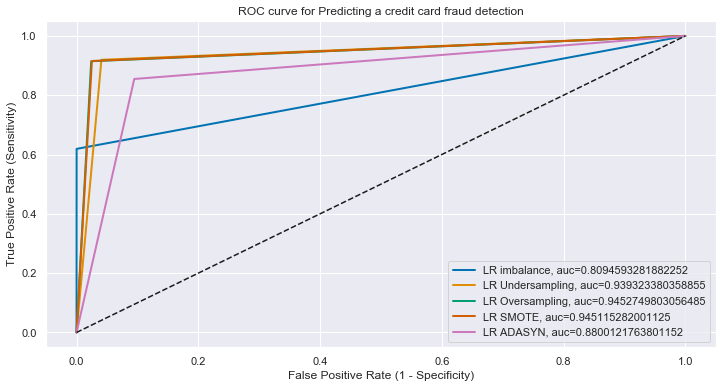

In [95]:
#------------------ Logistic Regression (LR) ------------------#
LRmodels = []

LRmodels.append(('LR imbalance', LogisticRegression(solver='liblinear', multi_class='ovr'),X,y))
LRmodels.append(('LR Undersampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_under,y_under))
LRmodels.append(('LR Oversampling', LogisticRegression(solver='liblinear', multi_class='ovr'),X_over,y_over))
LRmodels.append(('LR SMOTE', LogisticRegression(solver='liblinear', multi_class='ovr'),X_smote,y_smote))
LRmodels.append(('LR ADASYN', LogisticRegression(solver='liblinear', multi_class='ovr'),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(LRmodels)

### Decision Tree (DT)

Model Name : DT imbalance
Train Accuracy :1.00000
Test Accuracy :0.99924
Train AUC : 1.00000
Test AUC : 0.87399
Train Precision : 1.00000
Test Precision : 0.79710
Train Recall : 1.00000
Test Recall : 0.74830
Train F1 : 1.00000
Test F1 : 0.77193
Confusion Matrix : 
 [[85268    28]
 [   37   110]]


Model Name : DT Undersampling
Train Accuracy :1.00000
Test Accuracy :0.90878
Train AUC : 1.00000
Test AUC : 0.90899
Train Precision : 1.00000
Test Precision : 0.93571
Train Recall : 1.00000
Test Recall : 0.87919
Train F1 : 1.00000
Test F1 : 0.90657
Confusion Matrix : 
 [[138   9]
 [ 18 131]]


Model Name : DT Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99972
Train AUC : 1.00000
Test AUC : 0.99972
Train Precision : 1.00000
Test Precision : 0.99944
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99972
Confusion Matrix : 
 [[85124    48]
 [    0 85417]]


Model Name : DT SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99809
Train AUC : 1.00000
Test AUC : 0.99

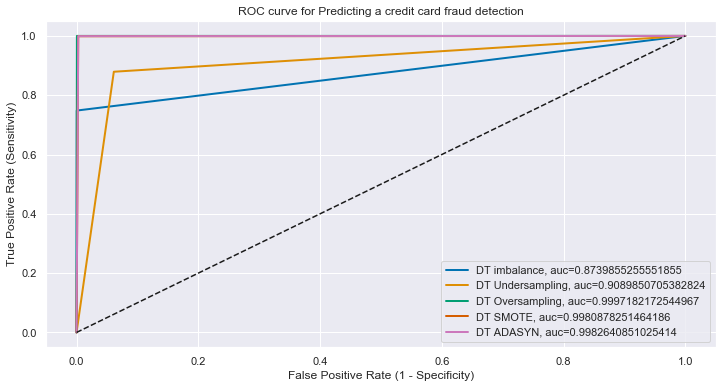

In [96]:
#-----------------Decision Tree (DT)------------------#
DTmodels = []

dt = DecisionTreeClassifier()

DTmodels.append(('DT imbalance', dt,X,y))
DTmodels.append(('DT Undersampling', dt,X_under,y_under))
DTmodels.append(('DT Oversampling', dt,X_over,y_over))
DTmodels.append(('DT SMOTE', dt,X_smote,y_smote))
DTmodels.append(('DT ADASYN', dt,X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(DTmodels)

### Random Forest (RF)

Model Name : RF imbalance
Train Accuracy :1.00000
Test Accuracy :0.99950
Train AUC : 1.00000
Test AUC : 0.87751
Train Precision : 1.00000
Test Precision : 0.94068
Train Recall : 1.00000
Test Recall : 0.75510
Train F1 : 1.00000
Test F1 : 0.83774
Confusion Matrix : 
 [[85289     7]
 [   36   111]]


Model Name : RF Undersampling
Train Accuracy :1.00000
Test Accuracy :0.94257
Train AUC : 1.00000
Test AUC : 0.94291
Train Precision : 1.00000
Test Precision : 0.99254
Train Recall : 1.00000
Test Recall : 0.89262
Train F1 : 1.00000
Test F1 : 0.93993
Confusion Matrix : 
 [[146   1]
 [ 16 133]]


Model Name : RF Oversampling
Train Accuracy :1.00000
Test Accuracy :0.99996
Train AUC : 1.00000
Test AUC : 0.99996
Train Precision : 1.00000
Test Precision : 0.99993
Train Recall : 1.00000
Test Recall : 1.00000
Train F1 : 1.00000
Test F1 : 0.99996
Confusion Matrix : 
 [[85166     6]
 [    0 85417]]


Model Name : RF SMOTE
Train Accuracy :1.00000
Test Accuracy :0.99989
Train AUC : 1.00000
Test AUC : 0.99

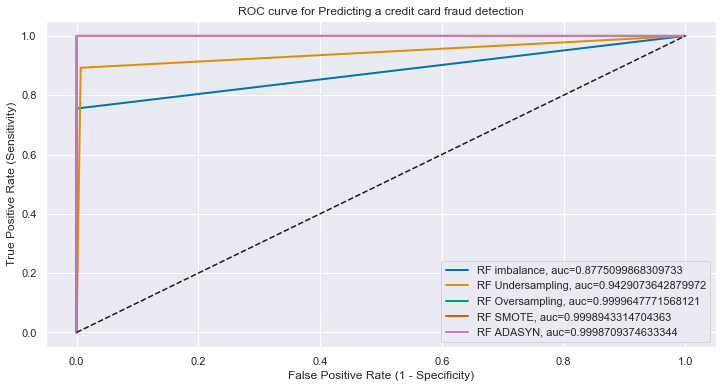

In [97]:
#-----------------Random Forest (RF) ------------------#
RFmodels = []
rf=RandomForestClassifier()
RFmodels.append(('RF imbalance', rf,X,y))
RFmodels.append(('RF Undersampling', rf,X_under,y_under))
RFmodels.append(('RF Oversampling', rf,X_over,y_over))
RFmodels.append(('RF SMOTE', rf,X_smote,y_smote))
RFmodels.append(('RF ADASYN', rf,X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(RFmodels)

### Naive Bayes (NB)

Model Name : NB imbalance
Train Accuracy :0.97793
Test Accuracy :0.97851
Train AUC : 0.90214
Test AUC : 0.90775
Train Precision : 0.06162
Test Precision : 0.06357
Train Recall : 0.82609
Test Recall : 0.83673
Train F1 : 0.11469
Test F1 : 0.11816
Confusion Matrix : 
 [[83484  1812]
 [   24   123]]


Model Name : NB Undersampling
Train Accuracy :0.91860
Test Accuracy :0.92905
Train AUC : 0.91844
Test AUC : 0.92953
Train Precision : 0.97049
Test Precision : 1.00000
Train Recall : 0.86297
Test Recall : 0.85906
Train F1 : 0.91358
Test F1 : 0.92419
Confusion Matrix : 
 [[147   0]
 [ 21 128]]


Model Name : NB Oversampling
Train Accuracy :0.91611
Test Accuracy :0.91606
Train AUC : 0.91608
Test AUC : 0.91614
Train Precision : 0.97078
Test Precision : 0.97055
Train Recall : 0.85795
Test Recall : 0.85840
Train F1 : 0.91088
Test F1 : 0.91104
Confusion Matrix : 
 [[82947  2225]
 [12095 73322]]


Model Name : NB SMOTE
Train Accuracy :0.91429
Test Accuracy :0.91414
Train AUC : 0.91425
Test AUC : 0.91

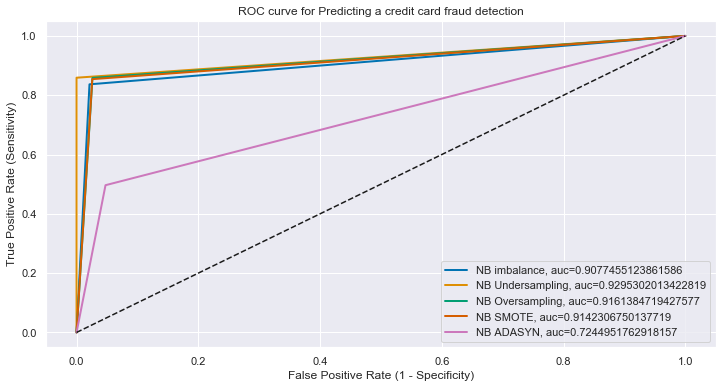

In [98]:
#------------------ Gaussian Naive Bayes (NB) ------------------#
NBmodels = []

NBmodels.append(('NB imbalance', GaussianNB(),X,y))
NBmodels.append(('NB Undersampling', GaussianNB(),X_under,y_under))
NBmodels.append(('NB Oversampling', GaussianNB(),X_over,y_over))
NBmodels.append(('NB SMOTE', GaussianNB(),X_smote,y_smote))
NBmodels.append(('NB ADASYN', GaussianNB(),X_adasyn,y_adasyn))

# Call function to create model and measure its performance
build_measure_model(NBmodels)

### Performance measures of various classifiers

In [99]:
data = {'Model':names_lst,
       'Accuracy_Train':accuracy_train_lst,
       'Accuracy_Test':accuracy_test_lst,
       'AUC_Train':aucs_train_lst,
       'AUC_Test':aucs_test_lst,
       'PrecisionScore_Train':precision_train_lst,
       'PrecisionScore_Test':precision_test_lst,
       'RecallScore_Train':recall_train_lst,
       'RecallScore_Test':recall_test_lst,
       'F1Score_Train':f1_train_lst,
       'F1Score_Test':f1_test_lst}

print("Performance measures of various classifiers: \n")
performance_df = pd.DataFrame(data) 
performance_df.sort_values(['AUC_Test','RecallScore_Test','F1Score_Test'],ascending=False)

Performance measures of various classifiers: 



,Model,Accuracy_Train,Accuracy_Test,AUC_Train,AUC_Test,PrecisionScore_Train,PrecisionScore_Test,RecallScore_Train,RecallScore_Test,F1Score_Train,F1Score_Test
12,RF Oversampling,1.000000,0.999965,1.000000,0.999965,1.000000,0.999930,1.000000,1.000000,1.000000,0.999965
13,RF SMOTE,1.000000,0.999894,1.000000,0.999894,1.000000,0.999789,1.000000,1.000000,1.000000,0.999895
14,RF ADASYN,1.000000,0.999871,1.000000,0.999871,1.000000,0.999742,1.000000,1.000000,1.000000,0.999871
7,DT Oversampling,1.000000,0.999719,1.000000,0.999718,1.000000,0.999438,1.000000,1.000000,1.000000,0.999719
9,DT ADASYN,1.000000,0.998265,1.000000,0.998264,1.000000,0.997276,1.000000,0.999262,1.000000,0.998268
8,DT SMOTE,1.000000,0.998089,1.000000,0.998088,1.000000,0.997300,1.000000,0.998888,1.000000,0.998093
2,LR Oversampling,0.946071,0.945231,0.946052,0.945275,0.975684,0.974442,0.914876,0.914607,0.944302,0.943577
3,LR SMOTE,0.945121,0.945073,0.945102,0.945115,0.974111,0.973276,0.914479,0.915438,0.943354,0.943472
11,RF Undersampling,1.000000,0.942568,1.000000,0.942907,1.000000,0.992537,1.000000,0.892617,1.000000,0.939929
1,LR Undersampling,0.956395,0.939189,0.956319,0.939323,0.981538,0.958042,0.930029,0.919463,0.955090,0.938356


**Insights**

* After training each of the models, these are the final results. All of the scores for Random Forest with Oversampling technique and the Random Forest with SMOTE technique models are very promising for our dataset! Each model has a high true positive rate and a low false-positive rate, which is exactly what we’re looking for.


* In the ROC graph above, the AUC scores for Random Forest with Oversampling technique is pretty high, which is what we’d like to see. As we move further right along the curve, we both capture more True Positives but also incur more False Positives. This means we capture more fraudulent transactions, but also flag even more normal transactions as fraudulent.
 
**So Random Forest with Oversampling technique  is our final model, as this gives highest Recall score of 100% on both train and test datasets.**

### <a id='gridsearch'>Grid Search</a>


In [100]:
# Use GridSearchCV to find the best parameters.
from sklearn.model_selection import GridSearchCV

#### <a id='gridsearchLR'> 1. Grid Search with Logistic Regression</a>

In [101]:
#------------ Logistic Regression ------------#
log_reg_params = {"solver": ['saga'],
                  "penalty": ['l1', 'l2'], 
                  'C':  [0.01, 0.1, 1, 10, 100], 
                  "max_iter" : [100000]},

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_under,y_train_under)

# Logistic Regression best estimator
print("Logistic Regression best estimator : \n",grid_log_reg.best_estimator_)

# predict test dataset
y_pred_lr = grid_log_reg.predict(X_test_under)

# f1 score
print('\nLogistic Regression f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_lr)))

Logistic Regression best estimator : 
 LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

Logistic Regression f1 Score : 0.92857


#### <a id='gridsearchKNN'> 2. Grid Search with K Nearest Neighbour Classifier</a>

In [102]:
#------------ K Nearest Neighbour ------------#
knears_params = {"n_neighbors": list(range(2,60,1)), 
                 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)

grid_knears.fit(X_train_under,y_train_under)

# KNears best estimator
print("KNN best estimator : \n",grid_knears.best_estimator_)

# predict test dataset
y_pred_knn = grid_knears.predict(X_test_under)

# f1 score
print('\nKNN f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_knn)))

KNN best estimator : 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNN f1 Score : 0.92473


#### <a id='gridsearchSVC'> 3. Grid Search with Support Vector Classifier</a>

In [103]:
#------------ Support Vector Classifier ------------#
svc_params = {'C': [0.5, 0.7, 0.9, 1], 
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train_under,y_train_under)

# SVC best estimator
print("SVC best estimator : \n",grid_svc.best_estimator_)

# predict test dataset
y_pred_svc = grid_svc.predict(X_test_under)

# f1 score
print('\nSVC f1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_svc)))

SVC best estimator : 
 SVC(C=0.9, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVC f1 Score : 0.92419


#### <a id='gridsearchDT'> 4. Grid Search with Decision Tree Classifier</a>

In [104]:
#------------ DecisionTree Classifier ------------#
tree_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}

grid_tree = GridSearchCV(estimator = DecisionTreeClassifier(),
                        param_grid = tree_params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)


grid_tree.fit(X_train_under,y_train_under)

# tree best estimator
print("Decision Tree best estimator : \n",grid_tree.best_estimator_)

# predict test dataset
y_pred_dt = grid_tree.predict(X_test_under)


# f1 score
print('\nf1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_dt)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Decision Tree best estimator : 
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 Score : 0.92029


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.2s finished


#### <a id='gridsearchRF'> 5. Grid Search with Random Forest Classifier</a>

In [105]:
#------------ RandomForest Classifier ------------#
forest_params = {"criterion": ["gini", "entropy"], 
               "max_depth": list(range(2,4,1)), 
               "min_samples_leaf": list(range(5,7,1))}

grid_forest = GridSearchCV(estimator = RandomForestClassifier(),
                        param_grid = forest_params,
                        scoring = 'accuracy', 
                        cv = 5, 
                        verbose = 1,
                        n_jobs = -1)


grid_forest.fit(X_train_under,y_train_under)

# random forest estimator
print("Random Forest best estimator : \n",grid_forest.best_estimator_)

# predict test dataset
y_pred_dt = grid_forest.predict(X_test_under)


# f1 score
print('\nf1 Score : {0:0.5f}'.format(metrics.f1_score(y_test_under , y_pred_dt)))

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    3.4s finished


Random Forest best estimator : 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

f1 Score : 0.92473


Feature: 0, Score: 0.03394
Feature: 1, Score: 0.02462
Feature: 2, Score: 0.03346
Feature: 3, Score: 0.16734
Feature: 4, Score: 0.01990
Feature: 5, Score: 0.01358
Feature: 6, Score: 0.03538
Feature: 7, Score: 0.04337
Feature: 8, Score: 0.01527
Feature: 9, Score: 0.04750
Feature: 10, Score: 0.03334
Feature: 11, Score: 0.06077
Feature: 12, Score: 0.01634
Feature: 13, Score: 0.14454
Feature: 14, Score: 0.01187
Feature: 15, Score: 0.02021
Feature: 16, Score: 0.06463
Feature: 17, Score: 0.02904
Feature: 18, Score: 0.01819
Feature: 19, Score: 0.01734
Feature: 20, Score: 0.01514
Feature: 21, Score: 0.01055
Feature: 22, Score: 0.01338
Feature: 23, Score: 0.01270
Feature: 24, Score: 0.01356
Feature: 25, Score: 0.01592
Feature: 26, Score: 0.01101
Feature: 27, Score: 0.01653
Feature: 28, Score: 0.04058


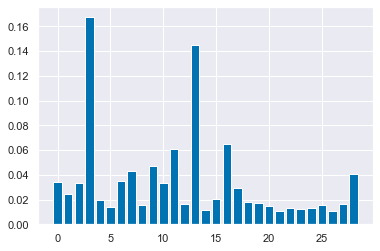

In [106]:
# get importance
importance = rf.feature_importances_
#importance.sort()
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

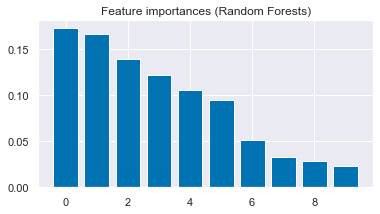

In [107]:
clf = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=100, max_depth=3, max_features='auto') #has already been tuned
clf.fit(X, y)
coefs = clf.feature_importances_
indices = np.argsort(coefs)[::-1]

plt.figure()
plt.title("Feature importances (Random Forests)")
plt.bar(range(10), coefs[indices[:10]],
       color="b", align="center")
#plt.xticks(range(10), rf.feature_names[indices[:10]], rotation=45, ha='right')
plt.subplots_adjust(bottom=0.3)

plt.ion(); plt.show()

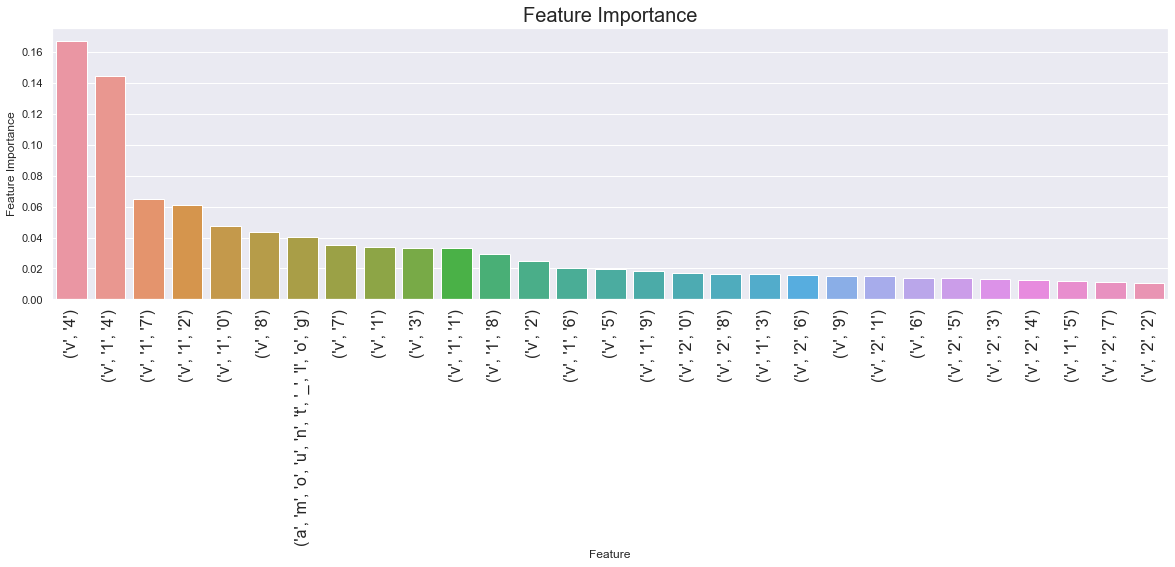

In [108]:
tmp = pd.DataFrame({'Feature': X, 'Feature Importance': rf.feature_importances_})
tmp = tmp.sort_values(by='Feature Importance',ascending=False)
plt.figure(figsize = (20,5))
plt.title('Feature Importance',fontsize=20)
s = sns.barplot(x='Feature',y='Feature Importance',data=tmp)
s.set_xticklabels(s.get_xticklabels(),rotation=90,fontsize=16)
plt.show()   


## <a id='concl'>Conclusion</a>

**Precision says how precise (how sure) is our model in detecting fraud transactions while recall is the amount of fraud cases our model is able to detect.**


**In reference of our case**:

- Recall (True Positive Rate): % of all fraudulent transactions cases captured.

- Precision: Out of all items labeled as fraud, what percentage of them is actually fraud?

- Accuracy: How correct the model is (misleading for fraud/imbalanced data)

- F1 score: combination of recall and precision into one metric. F1 score is the weighted average of precision and recall, taking BOTH false positives and false negatives into account. Usually much more useful than accuracy, especially with uneven classes.

- We were able to accurately identify fraudulent credit card transactions using a random forest model with oversampling technique. We, therefore, chose the random forest model with oversampling technique as the better model, which obtained recall score of 99% on the test set.


- To improve a chosen model, we searched over a grid of hyperparameters and compared performance with cross-validation. It may be possible to improve the random forest model by further tweaking the hyperparameters, given additional time and/or computational power.


1) Supervised Learning Methods clearly dominates Unsupervised Learning Methods for a class imbalance dataset.

2) Random Forest Classifier has higher accuracy than Logistic Regresssion.

3) Similarly, Random Forest Classifier has higher recall score than Logistic Regresssion.

4) Similarly, Random Forest Classifier has higher auc score Logistic Regresssion.

5) Therefore, We would like to conclude that Supervised Learning Methods such as Random Forest Classifier gives a better prediction over Unsupervised Methods.

- We were able to accurately identify fraudulent credit card transactions using a random forest model. We found that the five variables most correlated with fraud are, in decreasing order **V4, V14, V17, V10, and V12**.